<a href="https://colab.research.google.com/github/matteomrz/20242R0136COSE47402/blob/main/final/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai-clip
!pip install datasets
!pip install torch
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=7232a050b7ea687b4772aba1b05a391e7e399d200e65bdec402d9290f177118c
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling

In [23]:
from datasets import load_dataset

ds = load_dataset("bazyl/GTSRB")

train = ds['train']

# Map used Street Sign IDs to text descriptions
id_to_description = {
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Winding road",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic lights",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bike crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
}

# Filter for warning signs
train = [example for example in train if example['ClassId'] in id_to_description]

# Replace ClassId with Text Description
for instance in train:
    instance['ClassId'] = id_to_description[instance['ClassId']]

{'Width': 27,
 'Height': 26,
 'Roi.X1': 5,
 'Roi.Y1': 5,
 'Roi.X2': 22,
 'Roi.Y2': 20,
 'ClassId': 'Dangerous curve right',
 'Path': {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1b\x00\x00\x00\x1a\x08\x02\x00\x00\x00\xc9\xea\xb0\xa7\x00\x00\x05\x19IDATH\r\x1d\xc1YsT\xd7\x15\x05\xe0\xb5\xf6\x19n\xcf\x1a\x0c\xd8$\x8e\x87\x14\x95\x87<\x18\xb5\x84%U\xfe\xff_H\xe5)\xe5\x04l\x8a\x00\x16R7=\xdc{\xcf\xde+\xc2\xdf\xc7\x9f\xaen\r0\xc4\xb2\xe4\xe7\xa7O\xbb\xb3\xaf\xff\xf9\xcb\xbf2\x87\x92\xe2\xdb\xef\x9f\xff\xfa\xee\xf7\xc3\xb6\x87\xc7\x08\xe6Y\xde\xf6\xdb\x17\x7f\xff\xe9\xed/o8F\x8c\x0e\x8fp\x11"\x94\x08\x985\x05_^\xdd"\xc2\x88BV\xb3>b\x94\xe7d\'\xab2]\xa6\x0f\x9f\x0e1\xd0\x07\x0f\xa4\x00a\xe9\xc7\x17?\xbc\xfe\xcf\xbf\x13K4\xca\x9b\xb7f\x14\x15\xd9\x94\'u\xd7\x8f\xbc\xb8\xba\ro$\x8c\x94\x04\x10\x10\x89\xe9Lu\xa6\xc3\x98b\xcc1z4\'\xcc\x98\xa8p\x08\xa9\xe4T\xfb\xe3\x01\xe1D$bRR\x99O\xee\xf7G^^\xddJ\x01\x08\x10h\n\x10\xca\xc6l\xbbg\xdf\x9e\xbc~\xb7\x99\xa4\xc5$e\x8f8\xf6\xcd\x1d\n\x

In [3]:
import clip
import torch

model, preprocess = clip.load("ViT-B/32", jit=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 89.1MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [19]:
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

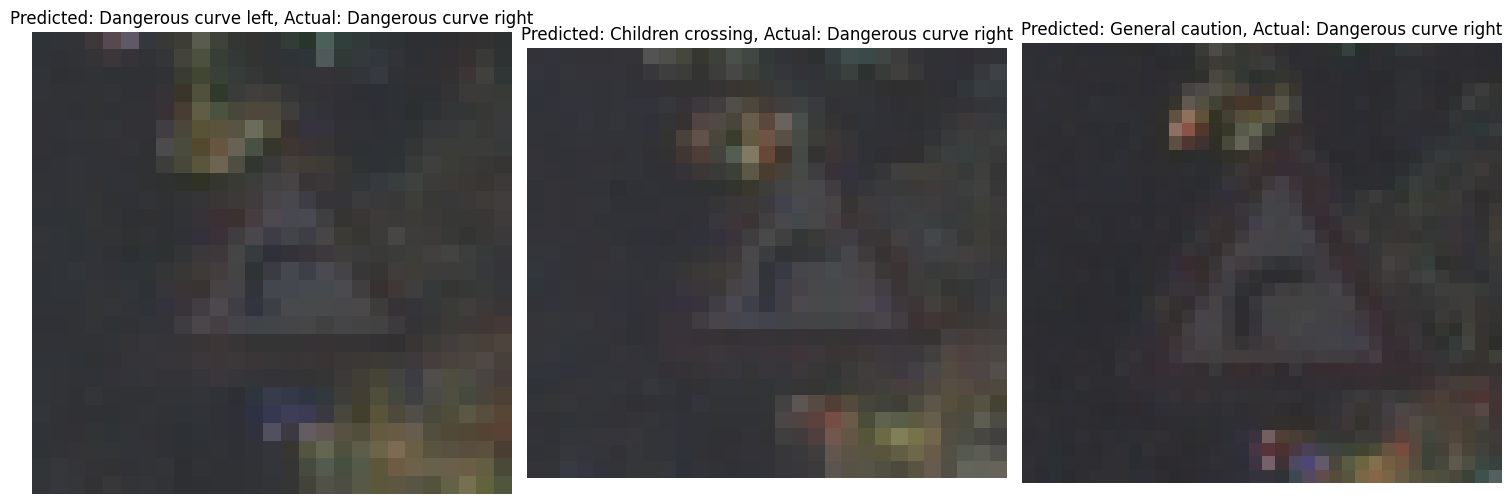

In [28]:
import matplotlib.pyplot as plt

# Select indices for three example images
indices = [0, 2, 10]

# Preprocess the text descriptions for each subcategory
text_inputs = torch.cat([clip.tokenize(f"a photo of a {text} warning sign") for text in id_to_description.values()]).to(device)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the indices and process each image
for i, idx in enumerate(indices):
    # Select an example image from the dataset
    example = train[idx]
    image = Image.open(BytesIO(example['Path']['bytes']))
    subcategory = example['ClassId']

    # Preprocess the image
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Calculate image and text features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize the features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity between image and text features
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(1)

    # Display the image in the subplot
    axes[i].imshow(image)
    axes[i].set_title(f"Predicted: {list(id_to_description.values())[indices[0]]}, Actual: {subcategory}")
    axes[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
